In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('features.csv')
print('df1.shape',df1.shape)
df1.head()

df1.shape (26707, 36)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
df2 = pd.read_csv('labels.csv',index_col='respondent_id')
df2.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [4]:
df1.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [5]:
print('df2.shape', df2.shape)
df2.head()

df2.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


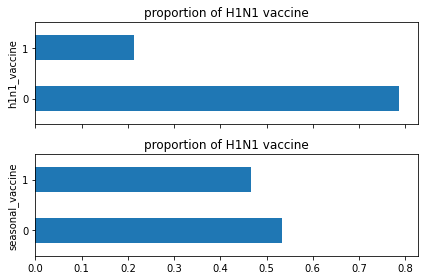

In [6]:
fig, ax = plt.subplots(2,1, sharex=True)#axis will be shared among all subplots

n_obs = df2.shape[0]

(df2['h1n1_vaccine'].value_counts().div(n_obs).plot.barh(title='proportion of H1N1 vaccine',ax=ax[0]))
ax[0].set_ylabel('h1n1_vaccine')

(df2['seasonal_vaccine'].value_counts().div(n_obs).plot.barh(title='proportion of H1N1 vaccine',ax=ax[1]))
ax[1].set_ylabel('seasonal_vaccine')

fig.tight_layout()

#### Nearly 50% of the people received seasonal flu vaccine<br>20% of the people received H1N1 flu vaccine.
H1N1 has moderately imbalanced data

<AxesSubplot:>

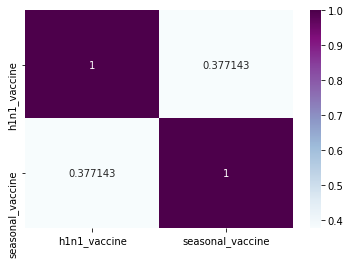

In [7]:
sb.heatmap(df2.corr(), annot=True,fmt='.6g',cmap='BuPu')

Two variables have 0.377 --> moderately positive correlation <br>
Most people who got an H1N1 flu vaccine also got the seasonal flu vaccine<br>
But, less no. of people got seasonal vaccine along with H1N1 vaccine. 

## Features

In [8]:
df_num = df1.select_dtypes(exclude='object')
df_num

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0


# Feature Preprocessing

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
df_num.iloc[:,:] = imputer.fit_transform(df_num)

In [10]:
df_num.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

In [11]:
df_obj = df1.select_dtypes(include="object")
df_obj

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_obj.iloc[:,:] = imputer.fit_transform(df_obj)

In [13]:
df_obj.isna().sum()

age_group                0
education                0
race                     0
sex                      0
income_poverty           0
marital_status           0
rent_or_own              0
employment_status        0
hhs_geo_region           0
census_msa               0
employment_industry      0
employment_occupation    0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_obj.iloc[:,:] = df_obj.iloc[:,:].apply(label.fit_transform)
df_obj

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,3,1,3,0,2,1,0,1,8,2,4,21
1,1,0,3,1,2,1,1,0,1,0,12,19
2,0,2,3,1,0,1,0,0,9,0,14,21
3,4,0,3,0,2,1,1,1,5,1,4,21
4,2,3,3,0,0,0,0,0,9,0,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,4,3,3,0,0,1,0,1,9,2,4,21
26703,0,2,3,1,0,1,1,0,6,1,4,2
26704,3,3,3,0,0,1,0,0,6,0,4,21
26705,0,3,1,0,0,0,1,0,5,2,4,6


In [15]:
new_df = pd.concat([df_num,df_obj,df2], axis=1)
new_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2,1,0,1,8,2,4,21,0,0
1,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,1,1,0,1,0,12,19,0,1
2,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,9,0,14,21,0,0
3,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2,1,1,1,5,1,4,21,0,1
4,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,9,0,18,5,0,0


In [16]:
new_df.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_ow

In [17]:
# droping these columns
new_df.drop(['respondent_id','health_insurance','employment_industry','employment_occupation','hhs_geo_region'], axis=1, inplace = True)
new_df.shape

(26707, 33)

In [18]:
new_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,3,0,2,1,0,1,2,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,3,1,2,1,1,0,0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,0,1,0,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,3,0,2,1,1,1,1,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,3,0,0,0,0,0,0,0,0


# Feature selection

In [19]:
X1 = new_df.iloc[:,:-2]
y1 = new_df.iloc[:,-2]
y1

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
bestfeatures = SelectKBest(score_func=chi2,k=15)
fit = bestfeatures.fit(X1,y1)

In [22]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)

In [23]:
featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['feature_names','Scores']

In [24]:
featurescores

,feature_names,Scores
0,h1n1_concern,201.358892
1,h1n1_knowledge,111.808117
2,behavioral_antiviral_meds,41.109698
3,behavioral_avoidance,15.950408
4,behavioral_face_mask,123.284462
5,behavioral_wash_hands,25.856864
6,behavioral_large_gatherings,5.614840
7,behavioral_outside_home,8.641545
8,behavioral_touch_face,43.065378
9,doctor_recc_h1n1,3307.810188


In [25]:
print(featurescores.nlargest(20,'Scores'))

                  feature_names       Scores
9              doctor_recc_h1n1  3307.810188
15            opinion_h1n1_risk  1914.151226
18            opinion_seas_risk  1222.319922
10         doctor_recc_seasonal   892.499456
13                health_worker   672.405011
14  opinion_h1n1_vacc_effective   495.639893
17  opinion_seas_vacc_effective   243.320341
0                  h1n1_concern   201.358892
11        chronic_med_condition   172.886102
4          behavioral_face_mask   123.284462
16  opinion_h1n1_sick_from_vacc   115.654361
1                h1n1_knowledge   111.808117
12         child_under_6_months   109.342915
22                    age_group    43.769495
8         behavioral_touch_face    43.065378
2     behavioral_antiviral_meds    41.109698
27               marital_status    30.561431
5         behavioral_wash_hands    25.856864
23                    education    20.145956
28                  rent_or_own    19.938027


# h1n1_vaccine prediction

In [26]:
X = new_df.iloc[:,:-2]
y = new_df.iloc[:,-2]
X

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,3,1,3,0,2,1,0,1,2
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1,0,3,1,2,1,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,2,3,1,0,1,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,4,0,3,0,2,1,1,1,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,2,3,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4,3,3,0,0,1,0,1,2
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0,2,3,1,0,1,1,0,1
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,3,3,3,0,0,1,0,0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0,3,1,0,0,0,1,0,2


# RandomOver sampler

In [27]:
from imblearn.over_sampling import RandomOverSampler
oversampling = RandomOverSampler()
X_smote, y_smote = oversampling.fit_sample(X, y)
X_smote.shape, y_smote.shape 

((42066, 31), (42066,))

In [28]:
X_smote['h1n1_concern'].value_counts()

2.0    17394
1.0    11932
3.0     8246
0.0     4494
Name: h1n1_concern, dtype: int64

In [29]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_smote))

Original dataset shape Counter({0: 21033, 1: 21033})


In [30]:
y_smote.value_counts()

0    21033
1    21033
Name: h1n1_vaccine, dtype: int64

# Training and Evaluation

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,test_size=0.20,random_state=42)

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
model2 = ExtraTreesClassifier()
model2.fit(X_train,y_train)
predict1 = model2.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
print('accuracy_score:',accuracy_score(y_test,predict1))
print('confusion_matrix:\n',confusion_matrix(y_test,predict1))
print('log loss:',log_loss(y_test,predict1))
print(classification_report(y_test,predict1))

accuracy_score: 0.9541240789160922
confusion_matrix:
 [[4017  270]
 [ 116 4011]]
log loss: 1.5845238388093277
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      4287
           1       0.94      0.97      0.95      4127

    accuracy                           0.95      8414
   macro avg       0.95      0.95      0.95      8414
weighted avg       0.95      0.95      0.95      8414



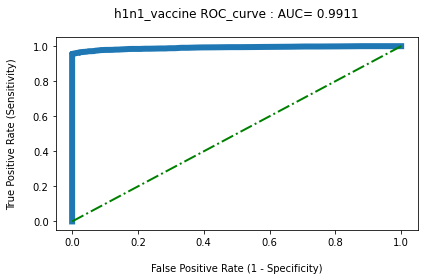

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
y_predict1 = model2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict1)
plt.plot(fpr, tpr, lw=6)
plt.plot([0,1],[0,1], color='green', linestyle='dashdot',lw=2)
plt.xlabel('\nFalse Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)\n')
plt.title(f"h1n1_vaccine ROC_curve : AUC= {roc_auc_score(y_test, y_predict1):.4f}\n")
plt.tight_layout()

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)
predict2 = model1.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
print('accuracy_score:',accuracy_score(y_test,predict2))
print('confusion_matrix:\n',confusion_matrix(y_test,predict2))
print('log loss:',log_loss(y_test,predict2))
print(classification_report(y_test,predict2))


accuracy_score: 0.9389113382457809
confusion_matrix:
 [[3872  415]
 [  99 4028]]
log loss: 2.1099670667836494
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      4287
           1       0.91      0.98      0.94      4127

    accuracy                           0.94      8414
   macro avg       0.94      0.94      0.94      8414
weighted avg       0.94      0.94      0.94      8414



In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
y_predict2 = model1.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_predict2)

0.9888241305655311

# catboost

In [49]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(learning_rate=0.2,n_estimators = 200,depth = 5,l2_leaf_reg =0.5,
                                random_seed = 2,colsample_bylevel = 0.9,verbose = False)
classifier

In [50]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
print('accuracy_score:',accuracy_score(y_test,pred))
print('confusion_matrix:\n',confusion_matrix(y_test,pred))
print('log loss:',log_loss(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score: 0.7908248157832184
confusion_matrix:
 [[3452  835]
 [ 925 3202]]
log loss: 7.224734266567272
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4287
           1       0.79      0.78      0.78      4127

    accuracy                           0.79      8414
   macro avg       0.79      0.79      0.79      8414
weighted avg       0.79      0.79      0.79      8414



In [52]:
y_pred = classifier.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

0.8761225763601183

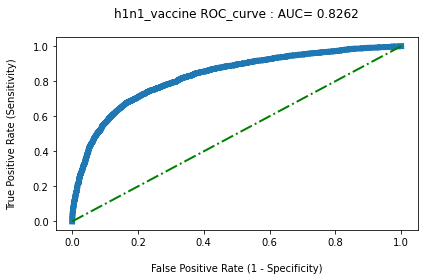

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, lw=6)
plt.plot([0,1],[0,1], color='green', linestyle='dashdot',lw=2)
plt.xlabel('\nFalse Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)\n')
plt.title(f"h1n1_vaccine ROC_curve : AUC= {roc_auc_score(y_test, y_pred):.4f}\n")
plt.tight_layout()

In [54]:
cb = CatBoostClassifier(learning_rate=0.3,iterations=20,loss_function = "CrossEntropy", train_dir = "crossentropy")
cb.fit(X_train,y_train,verbose=False)
y_predict = cb.predict_proba(X_test)

In [55]:
roc_auc_score(y_test,y_predict[:,1])

0.8444207469525559

# seasonal Vaccine

In [56]:
X_sea = new_df.iloc[:,:-2]
y_sea = new_df.iloc[:,-1]
y_sea

0        0
1        1
2        0
3        1
4        0
        ..
26702    0
26703    0
26704    1
26705    0
26706    0
Name: seasonal_vaccine, Length: 26707, dtype: int64

In [57]:
from imblearn.over_sampling import RandomOverSampler
oversampling = RandomOverSampler()
X_smote1, y_smote1 = oversampling.fit_sample(X_sea, y_sea)
X_smote1.shape, y_smote1.shape 

((28544, 31), (28544,))

In [58]:
y_smote1.value_counts()

0    14272
1    14272
Name: seasonal_vaccine, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_smote1,y_smote1,test_size = 0.20,random_state = 36)

# Extra trees

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
model_ex = ExtraTreesClassifier()
model_ex.fit(X_train1,y_train1)
predict4 = model_ex.predict(X_test1)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
print('accuracy_score:',accuracy_score(y_test1,predict4))
print('confusion_matrix:\n',confusion_matrix(y_test1,predict4))
print('log loss:',log_loss(y_test1,predict4))
print(classification_report(y_test1,predict4))

accuracy_score: 0.7936591346995971
confusion_matrix:
 [[2248  590]
 [ 588 2283]]
log loss: 7.126843642614924
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2838
           1       0.79      0.80      0.79      2871

    accuracy                           0.79      5709
   macro avg       0.79      0.79      0.79      5709
weighted avg       0.79      0.79      0.79      5709



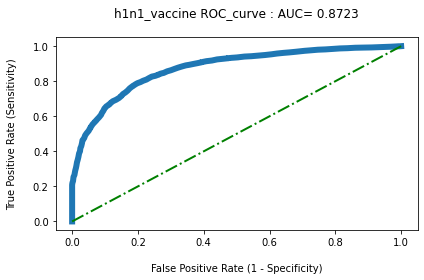

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred2 = model_ex.predict_proba(X_test1)[:,1]
fpr, tpr, thresholds = roc_curve(y_test1, y_pred2)
plt.plot(fpr, tpr, lw=6)
plt.plot([0,1],[0,1], color='green', linestyle='dashdot',lw=2)
plt.xlabel('\nFalse Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)\n')
plt.title(f"h1n1_vaccine ROC_curve : AUC= {roc_auc_score(y_test1, y_pred2):.4f}\n")
plt.tight_layout()

In [74]:
roc_auc_score(y_test1,y_pred2)

0.8723033228938311

In [79]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train1,y_train1)
predict5 = model_rf.predict(X_test1)

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
print('accuracy_score:',accuracy_score(y_test1,predict5))
print('confusion_matrix:\n',confusion_matrix(y_test1,predict5))
print('log loss:',log_loss(y_test1,predict5))
print(classification_report(y_test1,predict5))


accuracy_score: 0.7973375372219302
confusion_matrix:
 [[2235  603]
 [ 554 2317]]
log loss: 6.999797941173948
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2838
           1       0.79      0.81      0.80      2871

    accuracy                           0.80      5709
   macro avg       0.80      0.80      0.80      5709
weighted avg       0.80      0.80      0.80      5709



In [83]:
from sklearn.metrics import roc_auc_score
y_predict3 = model_rf.predict_proba(X_test1)[:,1]
roc_auc_score(y_test1, y_predict3)

0.8712977261129189

# catboost

In [84]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(learning_rate=0.2,n_estimators = 200,depth = 5,l2_leaf_reg =0.5,
                                random_seed = 2,colsample_bylevel = 0.9,verbose = False)
classifier

In [85]:
classifier.fit(X_train1,y_train1)
cb_pred = classifier.predict(X_test1)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
print('accuracy_score:',accuracy_score(y_test1,cb_pred))
print('confusion_matrix:\n',confusion_matrix(y_test1,cb_pred))
print('log loss:',log_loss(y_test1,cb_pred))
print(classification_report(y_test1,cb_pred))

accuracy_score: 0.7819232790331057
confusion_matrix:
 [[2225  613]
 [ 632 2239]]
log loss: 7.532188958642234
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2838
           1       0.79      0.78      0.78      2871

    accuracy                           0.78      5709
   macro avg       0.78      0.78      0.78      5709
weighted avg       0.78      0.78      0.78      5709



In [87]:
cb_pred1 = classifier.predict_proba(X_test1)[:,1]
roc_auc_score(y_test1,cb_pred1)

0.8584875510223617

In [88]:
cb = CatBoostClassifier(learning_rate=0.3,iterations=20,loss_function = "CrossEntropy", train_dir = "crossentropy")
cb.fit(X_train1,y_train1,verbose=False)
pred4 = cb.predict(X_test1)

In [89]:
print('accuracy_score:',accuracy_score(y_test1,pred4))
print('confusion_matrix:\n',confusion_matrix(y_test1,pred4))
print('log loss:',log_loss(y_test1,pred4))
print(classification_report(y_test1,pred4))

accuracy_score: 0.7826239271325977
confusion_matrix:
 [[2228  610]
 [ 631 2240]]
log loss: 7.507989010425044
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2838
           1       0.79      0.78      0.78      2871

    accuracy                           0.78      5709
   macro avg       0.78      0.78      0.78      5709
weighted avg       0.78      0.78      0.78      5709



In [90]:
pred3 = cb.predict_proba(X_test1)[:,1]
roc_auc_score(y_test1,pred3)

0.8558998897629795

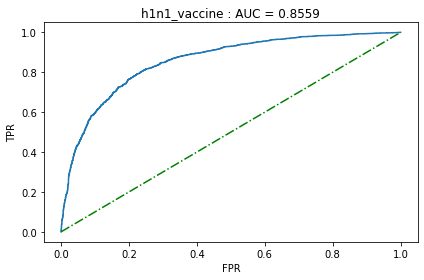

In [93]:
from sklearn.metrics import roc_curve
fig = plt.subplots(1, figsize=(6, 4))

fpr, tpr, thresholds = roc_curve(y_test1, pred3)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], color='green', linestyle='dashdot')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title(f"h1n1_vaccine : AUC = {roc_auc_score(y_test1, pred3):.4f}")
plt.tight_layout()

In [96]:
model_cb = CatBoostClassifier(loss_function='Logloss',learning_rate=0.1,iterations=1000, random_state=45,logging_level='Silent',eval_metric='AUC')
model_cb.fit(X_train1,y_train1)
pred2 = model_cb.predict_proba(X_test1)[:,1]

In [97]:
roc_auc_score(y_test1,pred2)

0.8573745032154305

# optuna

In [ ]:
import optuna

In [ ]:
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(X_smote1,y_smote1, test_size=0.3)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = CatBoostClassifier(**param)

    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict_proba(valid_x)[:,1]
    pred_labels = np.rint(preds)
    from sklearn.metrics import roc_auc_score
    roc_auc_score = roc_auc_score(valid_y, pred_labels)
    return roc_auc_score
 

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  roc_auc_score: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))